In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score

from src.clustering.spectral_clustering import SpectralClustering
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability
from src.kernel.transformation import get_all_transformations, ExpTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(100, 3, 0.2, 0.05)


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation


for kernel_class in get_all_kernels():
    results = {}
    for transformation in get_all_transformations():
        if skip_kernel(kernel_class, transformation):
            continue
        all_scores = []
        for i in range(0, 200):
            graph = generator.generate_graph()
            nodes = graph.nodes
            edges = graph.edges
            scores = []
            kernel = TransformedKernel(kernel_class(edges), transformation())
            for K in kernel.get_Ks():
                prediction = SpectralClustering(3).fit_predict(K)
                score = adjusted_rand_score(nodes, prediction)
                scores.append(score)
            all_scores.append(scores)
        print(kernel_class.name, transformation.name)
        all_scores = [list(i) for i in zip(*all_scores)]
        resulting_score = [np.mean(x) for x in all_scores]

        results[transformation.name] = resulting_score
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        plt.plot(kernel_class.default_params, resulting_score, label=transformation_name)
    plt.title(kernel_class.name)
    plt.legend()
    plt.show()


/Users/aynulin/PycharmProjects/diplom/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


PlainWalk NoTransformation


PlainWalk LogTransformation


PlainWalk SquareTransformation


PlainWalk SqrtTransformation


PlainWalk ExpTransformation


PlainWalk SigmoidTransformation


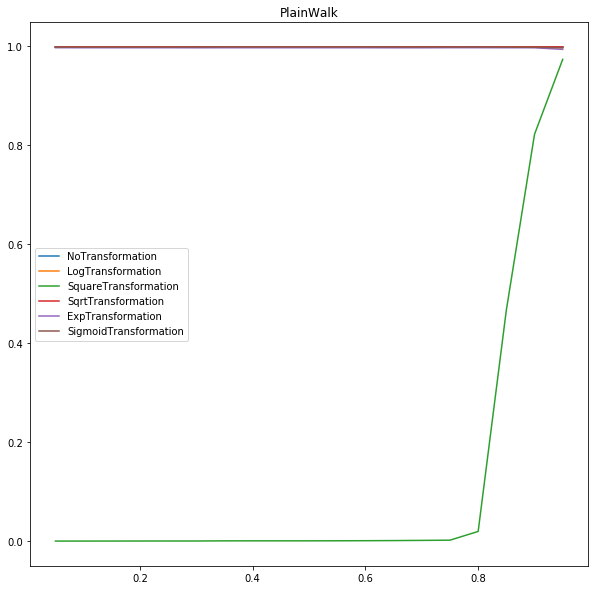

Communicability NoTransformation


Communicability LogTransformation


Communicability SquareTransformation


Communicability SqrtTransformation


Communicability SigmoidTransformation


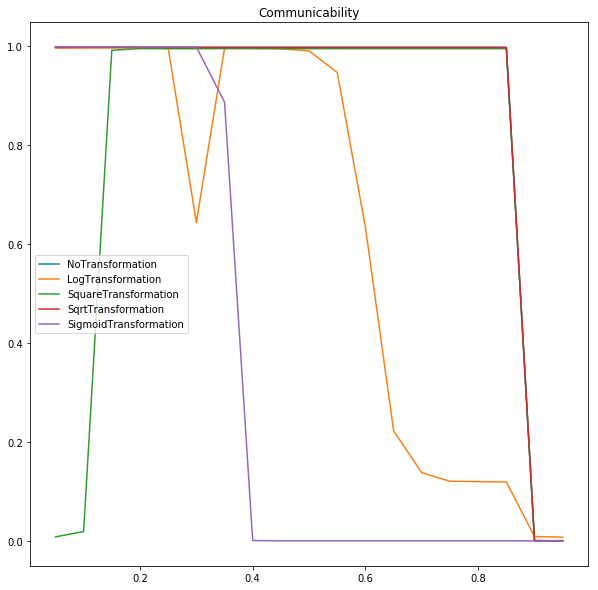

Forest NoTransformation


Forest LogTransformation


Forest SquareTransformation


Forest SqrtTransformation


Forest ExpTransformation


Forest SigmoidTransformation


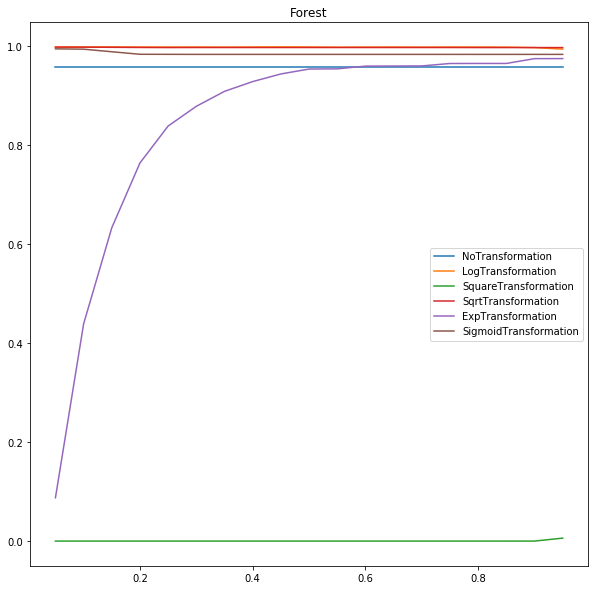

Heat NoTransformation


Heat LogTransformation


Heat SquareTransformation


Heat SqrtTransformation


Heat ExpTransformation


Heat SigmoidTransformation


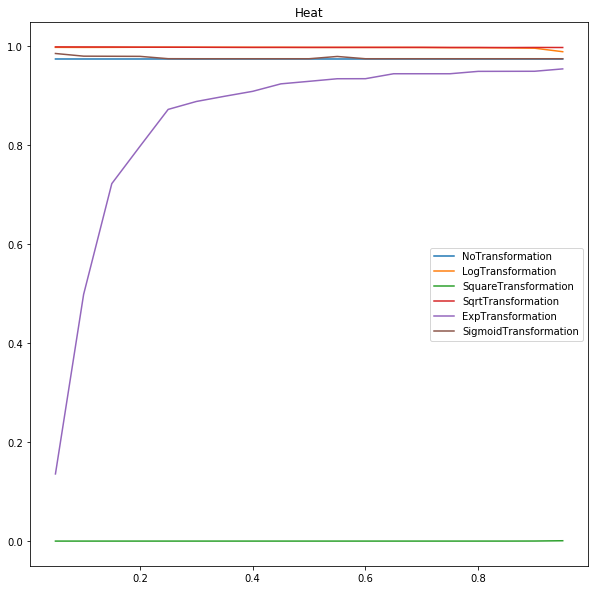

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score

from src.clustering.spectral_clustering import SpectralClustering
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability
from src.kernel.transformation import get_all_transformations, ExpTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(200, 2, 0.2, 0.05)


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation


for kernel_class in get_all_kernels():
    results = {}
    for transformation in get_all_transformations():
        if skip_kernel(kernel_class, transformation):
            continue
        all_scores = []
        for i in range(0, 200):
            graph = generator.generate_graph()
            nodes = graph.nodes
            edges = graph.edges
            scores = []
            kernel = TransformedKernel(kernel_class(edges), transformation())
            for K in kernel.get_Ks():
                prediction = SpectralClustering(2).fit_predict(K)
                score = adjusted_rand_score(nodes, prediction)
                scores.append(score)
            all_scores.append(scores)
        print(kernel_class.name, transformation.name)
        all_scores = [list(i) for i in zip(*all_scores)]
        resulting_score = [np.mean(x) for x in all_scores]

        results[transformation.name] = resulting_score
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        plt.plot(kernel_class.default_params, resulting_score, label=transformation_name)
    plt.title(kernel_class.name)
    plt.legend()
    plt.show()


/Users/aynulin/PycharmProjects/diplom/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


PlainWalk OneThirdTransform


PlainWalk SqrtTransformation


PlainWalk SigmoidTransformation


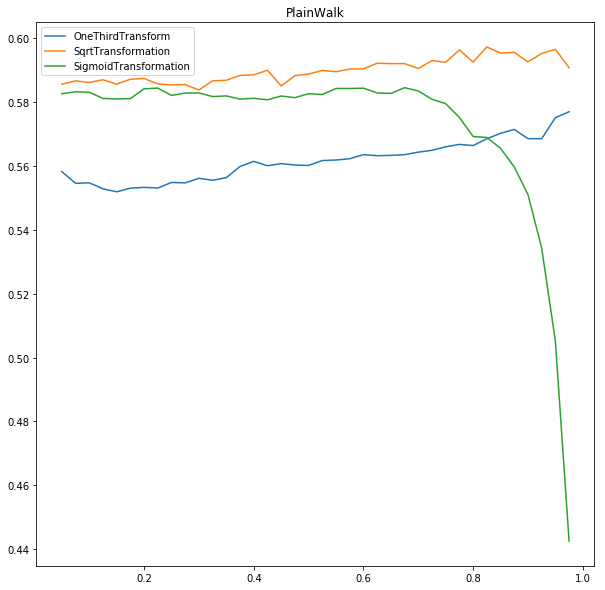

Communicability OneThirdTransform


Communicability SqrtTransformation


Communicability SigmoidTransformation


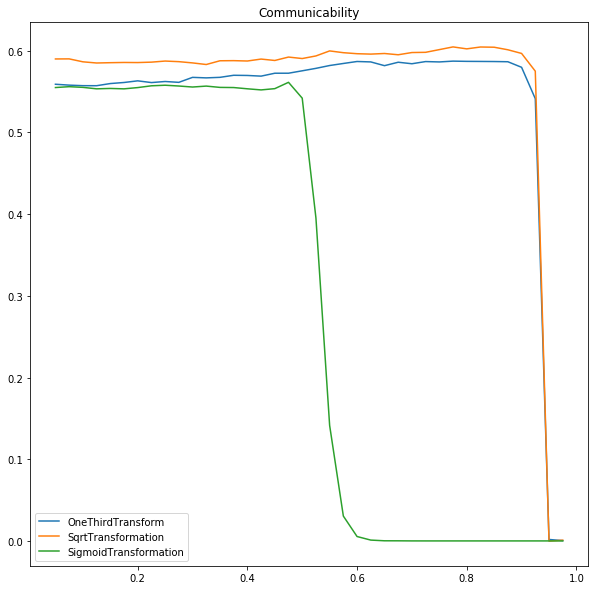

/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:45: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 3.0)


Forest OneThirdTransform


Forest SqrtTransformation


Forest SigmoidTransformation


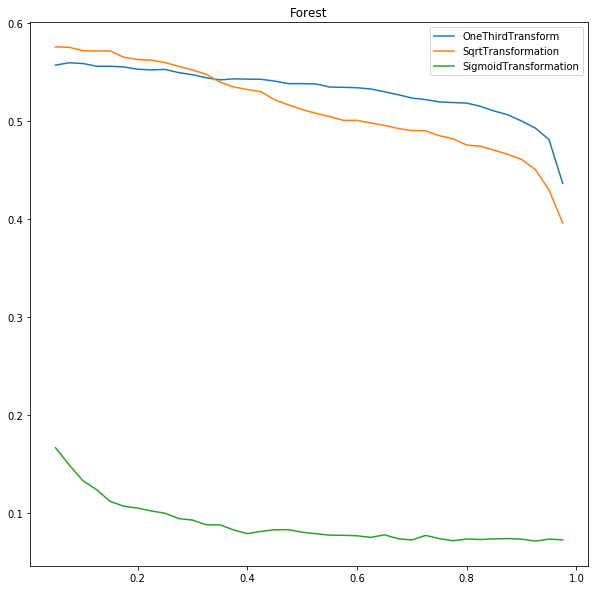

Heat OneThirdTransform


Heat SqrtTransformation


Heat SigmoidTransformation


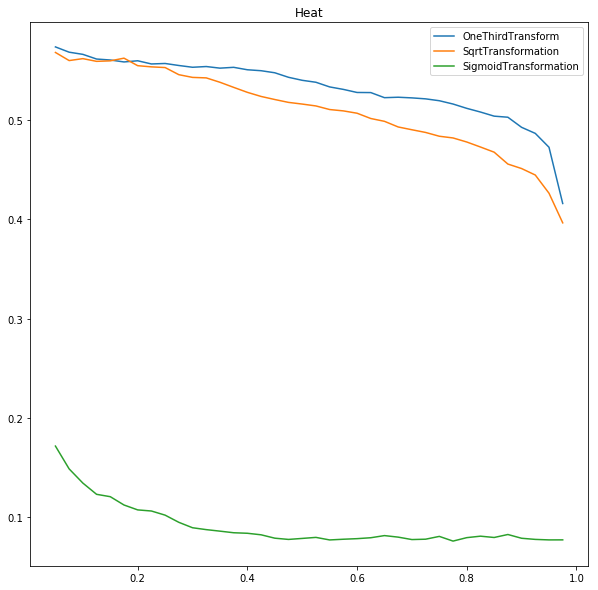

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score

from src.clustering.spectral_clustering import SpectralClustering
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability
from src.kernel.transformation import OneThirdTransform, ExpTransformation, SqrtTransformation, SigmoidTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(100, 3, 0.2, 0.05)


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation


for kernel_class in get_all_kernels():
    results = {}
    for transformation in [OneThirdTransform, SqrtTransformation, SigmoidTransformation]:
        if skip_kernel(kernel_class, transformation):
            continue
        all_scores = []
        for i in range(0, 200):
            graph = generator.generate_graph()
            nodes = graph.nodes
            edges = graph.edges
            scores = []
            kernel = TransformedKernel(kernel_class(edges), transformation())
            for K in kernel.get_Ks():
                K = np.nan_to_num(K)
                prediction = SpectralClustering(3).fit_predict(K)
                score = adjusted_rand_score(nodes, prediction)
                scores.append(score)
            all_scores.append(scores)
        print(kernel_class.name, transformation.name)
        all_scores = [list(i) for i in zip(*all_scores)]
        resulting_score = [np.mean(x) for x in all_scores]

        results[transformation.name] = resulting_score
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        plt.plot(kernel_class.default_params, resulting_score, label=transformation_name)
    plt.title(kernel_class.name)
    plt.legend()
    plt.show()


PlainWalk NoTransformation


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(K)


PlainWalk LogTransformation


PlainWalk SquareTransformation


PlainWalk SqrtTransformation


PlainWalk ExpTransformation


PlainWalk SigmoidTransformation


PlainWalk OneThirdTransform


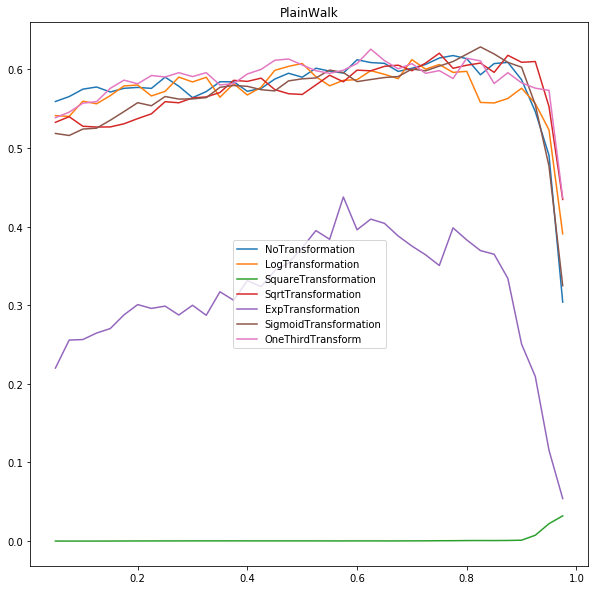

Communicability NoTransformation


Communicability LogTransformation


Communicability SquareTransformation


Communicability SqrtTransformation


Communicability SigmoidTransformation


Communicability OneThirdTransform


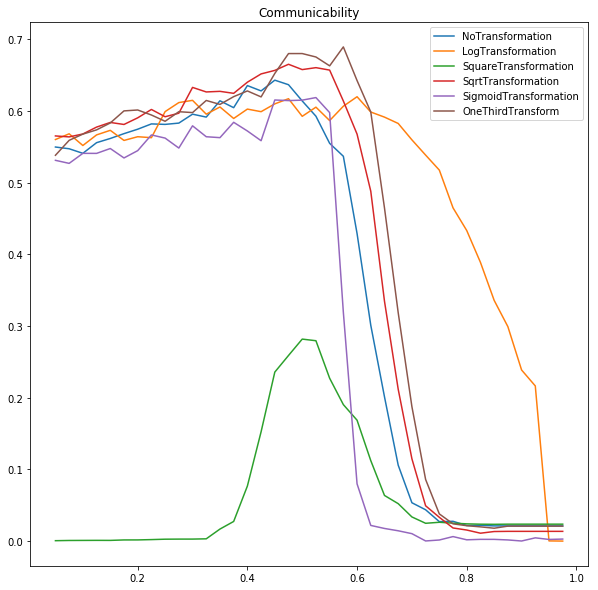

Forest NoTransformation


Forest LogTransformation


Forest SquareTransformation


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:54: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(K)


Forest SqrtTransformation


Forest ExpTransformation


Forest SigmoidTransformation


Forest OneThirdTransform


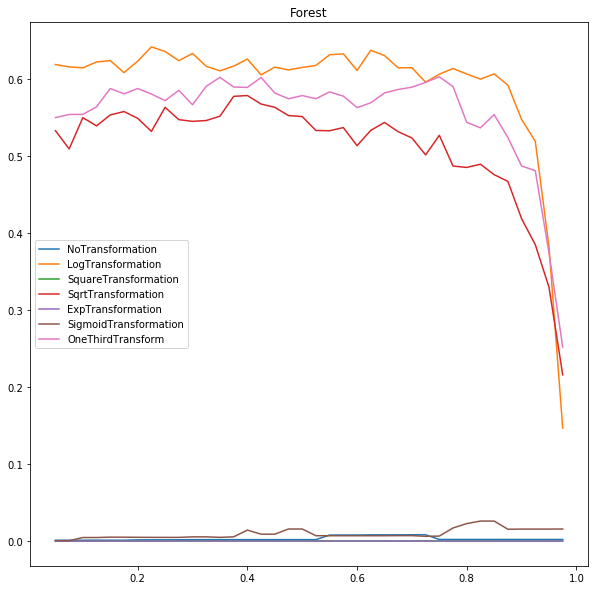

Heat NoTransformation


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(K)


Heat LogTransformation


Heat SquareTransformation


Heat SqrtTransformation


Heat ExpTransformation


Heat SigmoidTransformation


Heat OneThirdTransform


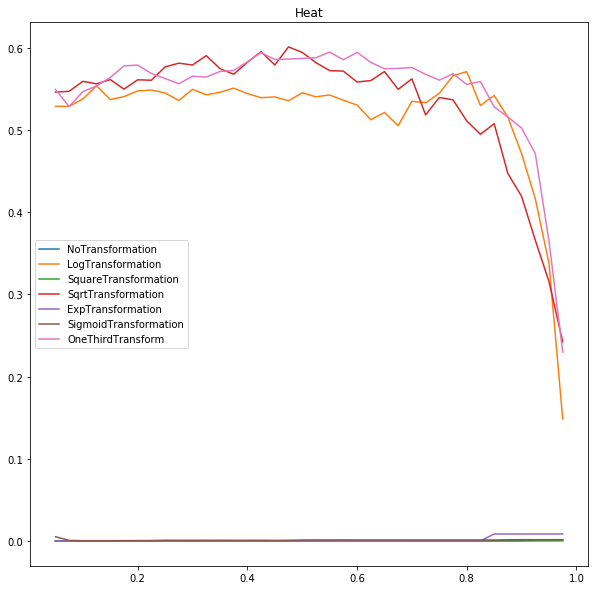

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score

from src.clustering.ward import Ward
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability
from src.kernel.transformation import get_all_transformations, ExpTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(100, 4, 0.2, 0.05)


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation


for kernel_class in get_all_kernels():
    results = {}
    for transformation in get_all_transformations():
        if skip_kernel(kernel_class, transformation):
            continue
        all_scores = []
        for i in range(0, 30):
            graph = generator.generate_graph()
            nodes = graph.nodes
            edges = graph.edges
            scores = []
            kernel = TransformedKernel(kernel_class(edges), transformation())
            for K in kernel.get_Ks():
                prediction = Ward(4).fit_predict(K)
                score = adjusted_rand_score(nodes, prediction)
                scores.append(score)
            all_scores.append(scores)
        print(kernel_class.name, transformation.name)
        all_scores = [list(i) for i in zip(*all_scores)]
        resulting_score = [np.mean(x) for x in all_scores]

        results[transformation.name] = resulting_score
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        plt.plot(kernel_class.default_params, resulting_score, label=transformation_name)
    plt.title(kernel_class.name)
    plt.legend()
    plt.show()


PlainWalk NoTransformation


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(K)


PlainWalk LogTransformation


PlainWalk SquareTransformation


PlainWalk SqrtTransformation


PlainWalk ExpTransformation


PlainWalk SigmoidTransformation


PlainWalk OneThirdTransform


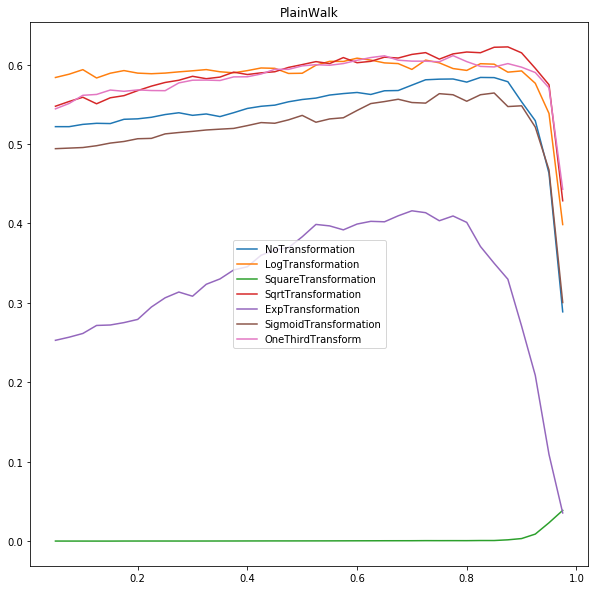

KeyboardInterrupt: 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score

from src.clustering.ward import Ward
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability
from src.kernel.transformation import get_all_transformations, ExpTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(100, 4, 0.2, 0.05)


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation


for kernel_class in get_all_kernels():
    results = {}
    for transformation in get_all_transformations():
        if skip_kernel(kernel_class, transformation):
            continue
        all_scores = []
        for i in range(0, 200):
            graph = generator.generate_graph()
            nodes = graph.nodes
            edges = graph.edges
            scores = []
            kernel = TransformedKernel(kernel_class(edges), transformation())
            for K in kernel.get_Ks():
                prediction = Ward(4).fit_predict(K)
                score = adjusted_rand_score(nodes, prediction)
                scores.append(score)
            all_scores.append(scores)
        print(kernel_class.name, transformation.name)
        all_scores = [list(i) for i in zip(*all_scores)]
        resulting_score = [np.mean(x) for x in all_scores]

        results[transformation.name] = resulting_score
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        plt.plot(kernel_class.default_params, resulting_score, label=transformation_name)
    plt.title(kernel_class.name)
    plt.legend()
    plt.show()


PlainWalk HeterogeneousCubeTransformation


PlainWalk HeterogeneousSquareTransformation


PlainWalk HeterogeneousSqrtTransformation


PlainWalk HeterogeneousOneThirdTransform


PlainWalk NoTransformation


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(K)


PlainWalk LogTransformation


PlainWalk SquareTransformation


PlainWalk SqrtTransformation


PlainWalk ExpTransformation


PlainWalk SigmoidTransformation


PlainWalk OneThirdTransform


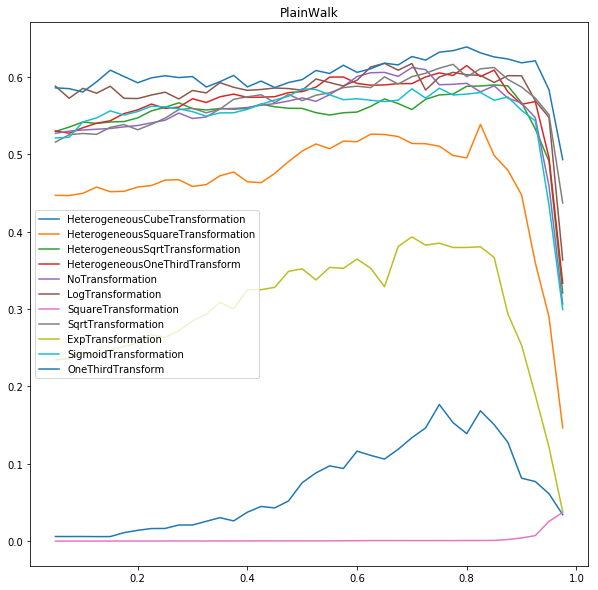

Communicability HeterogeneousCubeTransformation


Communicability HeterogeneousSquareTransformation


Communicability HeterogeneousSqrtTransformation


Communicability HeterogeneousOneThirdTransform


Communicability NoTransformation


Communicability LogTransformation


Communicability SquareTransformation


Communicability SqrtTransformation


Communicability SigmoidTransformation


Communicability OneThirdTransform


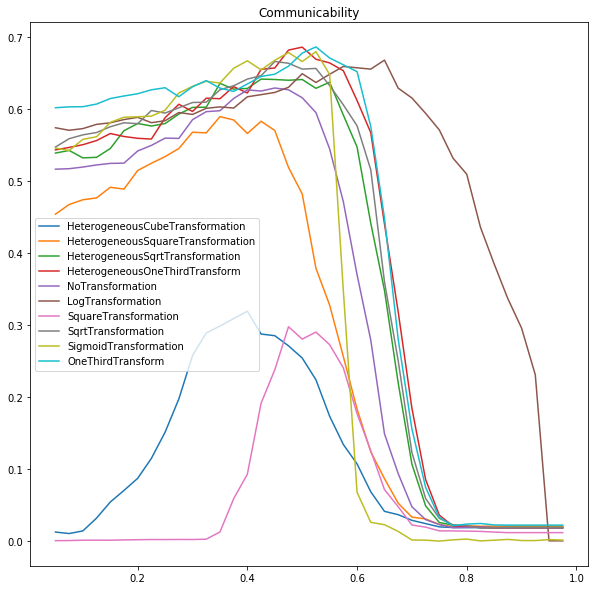

Forest HeterogeneousCubeTransformation


Forest HeterogeneousSquareTransformation


Forest HeterogeneousSqrtTransformation


Forest HeterogeneousOneThirdTransform


Forest NoTransformation


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(K)


Forest LogTransformation


Forest SquareTransformation


Forest SqrtTransformation


Forest ExpTransformation


Forest SigmoidTransformation


Forest OneThirdTransform


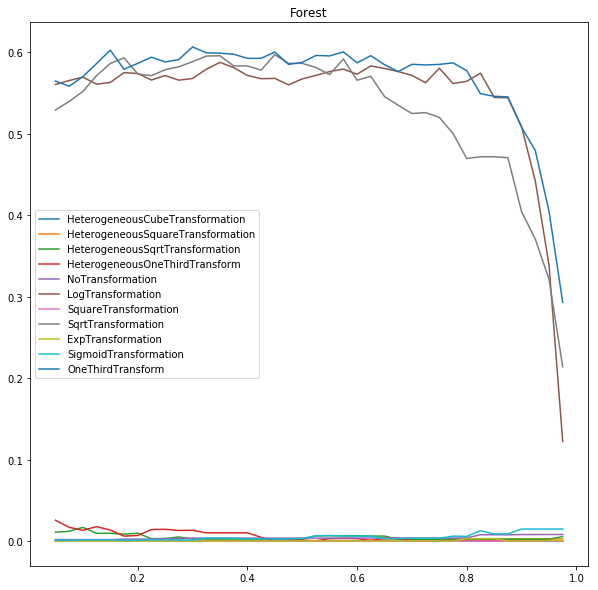

Heat HeterogeneousCubeTransformation


Heat HeterogeneousSquareTransformation


Heat HeterogeneousSqrtTransformation


Heat HeterogeneousOneThirdTransform


Heat NoTransformation


Heat LogTransformation


Heat SquareTransformation


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:56: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(K)


Heat SqrtTransformation


Heat ExpTransformation


Heat SigmoidTransformation


/Users/aynulin/PycharmProjects/diplom/src/kernel/transformation.py:48: RuntimeWarning: invalid value encountered in double_scalars
  K[i, j] = pow(K[i, j], 1.0 / 3.0)


Heat OneThirdTransform


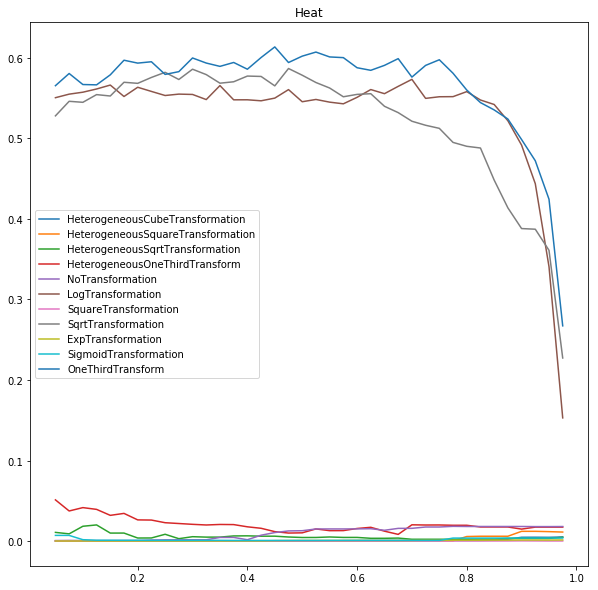

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score

from src.clustering.ward import Ward
from src.graph.graph_generator import GraphGenerator
from src.kernel.kernel import get_all_kernels, Communicability
from src.kernel.transformation import get_all_transformations, ExpTransformation
from src.kernel.transformed_kernel import TransformedKernel

generator = GraphGenerator(100, 4, 0.2, 0.05)


def skip_kernel(kernel_class, transformation):
    return kernel_class == Communicability and transformation == ExpTransformation


for kernel_class in get_all_kernels():
    results = {}
    for transformation in get_all_transformations():
        if skip_kernel(kernel_class, transformation):
            continue
        all_scores = []
        for i in range(0, 50):
            graph = generator.generate_graph()
            nodes = graph.nodes
            edges = graph.edges
            scores = []
            kernel = TransformedKernel(kernel_class(edges), transformation())
            for K in kernel.get_Ks():
                prediction = Ward(4).fit_predict(K)
                score = adjusted_rand_score(nodes, prediction)
                scores.append(score)
            all_scores.append(scores)
        print(kernel_class.name, transformation.name)
        all_scores = [list(i) for i in zip(*all_scores)]
        resulting_score = [np.mean(x) for x in all_scores]

        results[transformation.name] = resulting_score
    plt.figure(figsize=(10,10))
    for transformation_name, resulting_score in results.items():
        plt.plot(kernel_class.default_params, resulting_score, label=transformation_name)
    plt.title(kernel_class.name)
    plt.legend()
    plt.show()
